DS325 - Group Project: Analyzing Loan Risk 
 - Linh Vu & Linh Tran
 - The data csv file is too large, this is the link to the data set: https://www.kaggle.com/datasets/wordsforthewise/lending-club/data)

In [12]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

import matplotlib.pyplot as plt
import seaborn as sns



In [13]:
df = pd.read_csv('/Users/phuonglinhlinh/Downloads/Loandata.csv')
df


/var/folders/v5/4gbknswj0s54p5w79qx4x7yr0000gn/T/ipykernel_25493/816907836.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/phuonglinhlinh/Downloads/Loandata.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
display(df.describe())

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [15]:
#Drop columns with more than 50% missing values
missing_threshold = 0.5
df = df.loc[:, df.isnull().mean() < missing_threshold]

# Drop irrelevant/leakage columns manually
cols_to_drop = [
    'id', 'member_id', 'url', 'desc', 'title', 'zip_code',
    'emp_title', 'earliest_cr_line', 'issue_d', 'last_pymnt_d', 
    'next_pymnt_d', 'last_credit_pull_d', 'disbursement_method'
]
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
df = df.dropna()

df


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,...,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,...,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,...,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,...,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,N
6,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,10+ years,MORTGAGE,...,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260693,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,4 years,OWN,...,100.0,0.0,0.0,2.0,128902.0,31320.0,93700.0,28602.0,N,N
2260695,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,10+ years,MORTGAGE,...,75.9,42.9,0.0,1.0,227883.0,140118.0,27900.0,172283.0,N,N
2260696,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,9 years,MORTGAGE,...,75.7,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,N,N
2260697,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,6 years,RENT,...,96.2,40.0,1.0,0.0,84664.0,62426.0,20700.0,58764.0,N,Y


<Figure size 1000x600 with 0 Axes>

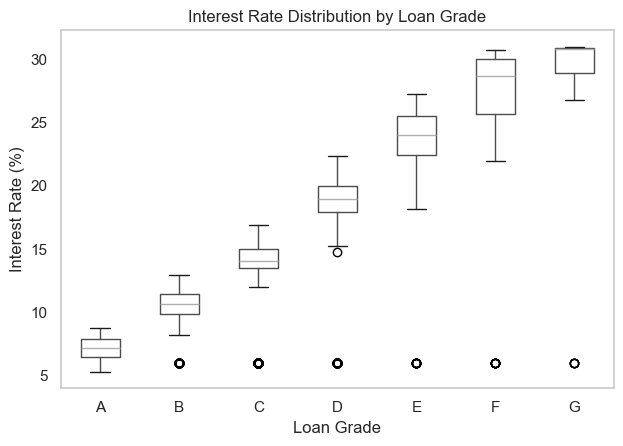

In [18]:
df = df[['grade', 'int_rate']].dropna()

# Convert interest rate to numeric if it's a string with '%'
if df['int_rate'].dtype == 'object':
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

# Plot
plt.figure(figsize=(10, 6))
df.boxplot(column='int_rate', by='grade', grid=False)
plt.title('Interest Rate Distribution by Loan Grade')
plt.suptitle('')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.tight_layout()
plt.show()